Starting with the Field Equation
\begin{center}
$\frac{d}{dx}[K(x)A(x)\frac{dT(x)}{dx}]+P(x)T+Q(x)$
\end{center}
with boundary conditions
\begin{center}
$T(x_0)=T_0 = 100^{\circ}C$\\
$T(x_L)=T_L = 10^{\circ}C$
\end{center}
We will assume the conductivity to be arbitrary but constant with x, and A(x) to be 1. We will also assume P(x) = Q(x) = 0

In [21]:
# Setting BC's
T_0 = 100
T_F = 10
# setting conductivity to a random (physically realisable) value
k = .3

Next mu can decide our geometry to be a rod with
    \begin{center}
        $0 \leq x \leq \ell$
    \end{center}
Where will set
    \begin{center}
        \ell=1
    \end{center}

In [22]:
# Length of the rod
length=10

We need to set the number of nodes. The more nodes we have the more accurate our solution will be

In [23]:
# Number of Nodes
N = 4

Let's briefly review what we did in class so we can generate our matrices and solve. We will not drop P or Q to keep generality in our derivation.
With the variational principle we know that
\begin{center}
I = \int_{x_0}^{x_L} [\frac{1}{2}K(\frac{dT(x)}{dx})^{2}-\frac{1}{2}PT(x)^{2}-QT(x)]dx
\end{center}
We want to find T(x) so $\delta I = 0$
We know between each element we want linear variation between $x_{i}$ and $x_{j}$

<center><img src="TemperatureApproximation.png"/></center>

So the temperature between elements is
\begin{center}
$T(x)_{i \shortrightarrow{} j} = N_{i}(x)T_{i}+N_{j}(x)T_{j}$
\end{center}
We know
    \begin{center}
        $N_{i}(x) = 1 - \frac{x}{\ell_{i}}$ \hspace{15mm} $\frac{dN_{i}}{dx} = -\frac{x}{\ell_{i}}$ \\
    \end{center}
    \begin{center}
        $N_{j}(x) = \frac{x}{\ell_{i}}$ \hspace{15mm} $\frac{dN_{j}}{dx} = \frac{x}{\ell_{i}}$
    \end{center}

So we subsituting $T(x)_{i \shortrightarrow{} j}$ into our functional
    \begin{center}
    $T(x)^{2}_{i \shortrightarrow{} j} = N_{i}(x)^{2}T_{i}^{2}+2N_{i}(x)T_{i}N_{j}(x)T_{j}(x)+N_{j}^{2}(x)T_{j}^{2}$ \\
    \end{center}
    \begin{center}
    $\frac{dT}{dx} = \frac{dN_{i}}{dx}T_{i} + \frac{dN_{j}}{dx}T_{j}$
    \end{center}
    \begin{center}
    $(\frac{dT}{dx})^{2} = (\frac{dN_{i}}{dx})^{2}T_{i}^{2} + 2\frac{dN_{i}}{dx}T_{i}\frac{dN_{j}}{dx}T_{j}  + (\frac{dN_{j}}{dx})^{2}T_{j}^{2}$
    \end{center}
    \begin{center}
    $I = \int_{x_0}^{x_L} [\frac{1}{2}K((\frac{dN_{i}}{dx})^{2}T_{i}^{2} + 2\frac{dN_{i}}{dx}T_{i}\frac{dN_{j}}{dx}T_{j}  + (\frac{dN_{j}}{dx})^{2}T_{j}^{2})-\frac{1}{2}P[N_{i}(x)^{2}T_{i}^{2}+2N_{i}(x)T_{i}N_{j}(x)T_{j}(x)+N_{j}^{2}(x)T_{j}^{2}]-Q(N_{i}(x)T_{i}+N_{j}(x)T_{j})]dx
    \end{center}

For the e'th element
    \begin{center}
        $\delta I^{e} = \frac{dI_{e}}{dT_{i}}\delta T_{i} + \frac{dI_{e}}{dT_{j}}\delta T_{j}$
    \end{center}

So
    \begin{center}
        $\delta I^{e} = \int_{x_{i}}^{x_j}
        \left(
        \[
        \left[
        k(\frac{dN_{i}}{dx})^{2}T_{i} + k\frac{dN_{i}}{dx}\frac{dN_{j}}{dx}T_{j}
        \right]
        \]
        + [-PN_{i}^{2}T_{i}-PN_{i}N_{j}T_{j}]-Q[N_{i}]
        \right)dx\delta T_{i}$
    \end{center}
    \begin{center}
        $+
        \left(
        \[
        \left[
        k(\frac{k\frac{dN_{i}}{dx}\frac{dN_{j}}{dx}T_{i}+dN_{j}}{dx})^{2}T_{j}
        \right]
        \]
        + [-PN_{i}N_{j}T_{i}-PN_{j}^{2}T_{j}]-Q[N_{j}]
        \right)dx\delta T_{j}$
    \end{center}

Now lets turn this equation into matrix form
    $ \delta I^{e} =
        \begin{Bmatrix}\delta T_{i} & \delta T_{j}\end{Bmatrix}
        \begin{bmatrix}
        \begin{bmatrix}
            \int_{x_{i}}^{x_j} \left(k\left(\frac{dN_{i}}{dx}\right)^{2} -PN_{i}^{2}\right)dx & \int_{x_{i}}^{x_j} \left(k\frac{dN_{i}}{dx}\frac{dN_{j}}{dx} - PN_{i}N_{j}\right)dx  \\
            \int_{x_{i}}^{x_j} \left(k\frac{dN_{i}}{dx}\frac{dN_{j}}{dx} - PN_{i}N_{j}\right) & \int_{x_{i}}^{x_j} \left(k\left(\frac{dN_{j}}{dx}\right)^{2} -PN_{j}^{2}\right)dx
        \end{bmatrix}
        \begin{Bmatrix}
            T_{i} \\
            T_{j}
        \end{Bmatrix} -
        \begin{Bmatrix}
            \int_{x_{i}}^{x_j}(QN_{i}) dx\\
            \int_{x_{i}}^{x_j}(QN_{j}) dx
        \end{Bmatrix}
        \end{bmatrix}
        =
        \begin{Bmatrix}\delta T_{i} & \delta T_{j}\end{Bmatrix}
        \begin{bmatrix}
        \begin{bmatrix}
            E_{11} & E_{12}  \\
            E_{21} & E_{22}
        \end{bmatrix}
        \begin{Bmatrix}
            T_{i} \\
            T_{j}
        \end{Bmatrix} -
        \begin{Bmatrix}
            R_{1}\\
            R_{2}
        \end{Bmatrix}
        \end{bmatrix}
    $

The next element would be solved similarly
$ \delta I^{e+1} =
        \begin{Bmatrix}\delta T_{j} & \delta T_{k}\end{Bmatrix}
        \begin{bmatrix}
        \begin{bmatrix}
            \int_{x_{j}}^{x_j} \left(k\left(\frac{dN_{j}}{dx}\right)^{2} -PN_{j}^{2}\right)dx & \int_{x_{j}}^{x_j} \left(k\frac{dN_{j}}{dx}\frac{dN_{k}}{dx} - PN_{j}N_{k}\right)dx  \\
            \int_{x_{j}}^{x_j} \left(k\frac{dN_{j}}{dx}\frac{dN_{k}}{dx} - PN_{j}N_{k}\right) & \int_{x_{j}}^{x_j} \left(k\left(\frac{dN_{k}}{dx}\right)^{2} -PN_{k}^{2}\right)dx
        \end{bmatrix}
        \begin{Bmatrix}
            T_{j} \\
            T_{k}
        \end{Bmatrix} -
        \begin{Bmatrix}
            \int_{x_{j}}^{x_j}(QN_{j}) dx\\
            \int_{x_{j}}^{x_j}(QN_{k}) dx
        \end{Bmatrix}
        \end{bmatrix}
        =
        \begin{Bmatrix}\delta T_{j} & \delta T_{k}\end{Bmatrix}
        \begin{bmatrix}
        \begin{bmatrix}
            F_{11} & F_{12}  \\
            F_{21} & F_{22}
        \end{bmatrix}
        \begin{Bmatrix}
            T_{j} \\
            T_{k}
        \end{Bmatrix} -
        \begin{Bmatrix}
            S_{1}\\
            S_{2}
        \end{Bmatrix}
        \end{bmatrix}
        $

We must make the right go to zero

$
\begin{center}
        \begin{bmatrix}
            E_{11} & E_{12} & 0 \\
            E_{21} & E_{22}+F_{11} & F_{12} \\
            0 & F_{21} & F_{22}
        \end{bmatrix}
        \begin{Bmatrix}
            T_{i} \\
            T_{j} \\
            T_{k}
        \end{Bmatrix} -
        \begin{Bmatrix}
            R_{} \\
            R_{2}+S_{1} \\
            S_{2}
        \end{Bmatrix}
\end{center} = \vec{0}
$

So in general
$
\begin{center}
    \delta I^{e}+\delta I^{e+1} + \delta I^{e+2} + \hdots =
        \begin{Bmatrix}
            T_{i} & T_{j} & T_{k} & T_{l} & \hdots
        \end{Bmatrix}
        \begin{bmatrix}
            \begin{bmatrix}
                E_{11} & E_{12} & 0  & \hdots &\hdots\\
                E_{21} & E_{22}+F_{11} & F_{12} & 0 & \hdots\\
                0 & F_{21} & F_{22} + G_{11} & G_{12}  & \hdots\\
                0 & 0 & G_{21} & G_{22}+\hdots & \hdots \\
                \vdots & \vdots & \vdots & \vdots & \ddots \\
            \end{bmatrix}
            \begin{Bmatrix}
                T_{i} \\
                T_{j} \\
                T_{k} \\
                T_{l} \\
                \vdots
            \end{Bmatrix} -
            \begin{Bmatrix}
                R_{1} \\
                R_{2}+S_{1} \\
                S_{2}+U_{1} \\
                U_{2}+\hdots \\
                \vdots
            \end{Bmatrix}
        \end{bmatrix}
\end{center}
$
$
\begin{center}
        \begin{bmatrix}
            E_{11} & E_{12} & 0  & \hdots &\hdots\\
            E_{21} & E_{22}+F_{11} & F_{12} & 0 & \hdots\\
            0 & F_{21} & F_{22} + G_{11} & G_{12}  & \hdots\\
            0 & 0 & G_{21} & G_{22}+\hdots & \hdots \\
            \vdots & \vdots & \vdots & \vdots & \ddots \\
        \end{bmatrix}
        \begin{Bmatrix}
            T_{i} \\
            T_{j} \\
            T_{k} \\
            T_{l} \\
            \vdots
        \end{Bmatrix} -
        \begin{Bmatrix}
            R_{1} \\
            R_{2}+S_{1} \\
            S_{2}+U_{1} \\
            U_{2}+\hdots \\
            \vdots
        \end{Bmatrix}
\end{center} = \vec{0}
$
Now we can build our matrices

In [24]:
#Use these packages to build the diagonal matrix
from scipy.sparse import diags



$N_j$

In [25]:
def n_j(x):
    return x/length


$N_i$

In [26]:
def n_i(x):
    return 1-x/length

$\frac{dN_{i}}{dx}$

In [27]:
def dni_dx(x):
    return (-1/length)

$\frac{dN_{j}}{dx}$


In [28]:
# dN_j/dx
def dnj_dx(x):
    return 1/length

$\left(\frac{dN_{i}}{dx}\right)^{2}$


In [29]:
def dni_dx2(x):
    return dni_dx(x)*dni_dx(x)

$\left( \frac{dN_{j}}{dx}\right)^{2}$


In [30]:
def dnj_dx2(x):
    return dni_dx(x)*dni_dx(x)

P(x)

In [31]:
# Convenvtion term
def P(x):
    return 0*x

Q(x)

In [32]:
# Internal heat generation
def Q(x):
    return 0*x

$PN_{i}^2$

In [33]:
def pn_i2(x):
    return P(x)*n_i(x)*n_i(x)

$PN_{j}^2$

In [34]:
def pn_j2(x):
    return P(x)*n_j(x)*n_j(x)

$\frac{dN_{i}}{dx}\frac{dN_{j}}{dx}$


In [35]:
def dn_idn_j_dx(x):
    return dni_dx(x)*dnj_dx(x)

$PN_{i}N_{j}$

In [36]:
def pn_in_j(x):
    return P(x)*n_i(x)*n_j(x)

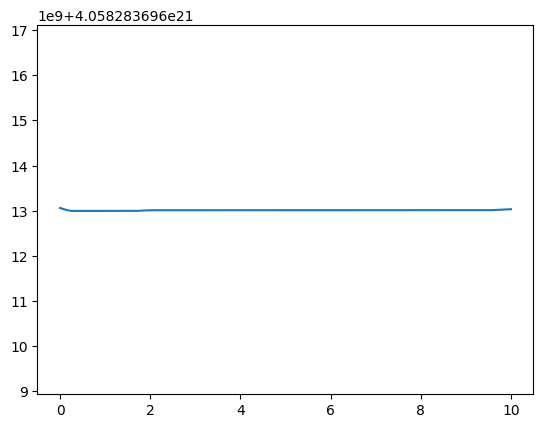

In [41]:
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt
def dirichlet(n, bc1, bc2, l):
    """

    :param n: Number of Nodes
    :param bc1: Boundary condition at x = 0
    :param bc2: Boundary Condition at x = L
    :param l: Length of cross-section
    :return: A matrix as np array, u as np array and x as np arraay
    """
    import numpy as np
    x = np.linspace(0.0, l, n)

    A = np.zeros([n,n])
    b = np.zeros(n)
    start = 0
    step = l/n
    for i in range(0, n):
        end = start + step

        if i == 0:
            # Diagonal
            A[i, i] = k*quad(dni_dx2, start, end)[0] - quad(pn_i2, start, end)[0]
            # Upper Diagonal
            A[i, i+1] = k*quad(dn_idn_j_dx, start, end)[0] - quad(pn_in_j, start, end)[0]
            b[i] = bc1
        elif i < n-1:
            # Lower Diagonal
            A[i, i-1] = k*quad(dn_idn_j_dx, start, end)[0] - quad(pn_in_j, start, end)[0]
            # Diagonal (Int{xi}^xJ + Int{xj}^xk)
            A[i, i] = (k*quad(dnj_dx2, start, end)[0] - quad(pn_j2, start, end)[0]) + (k*quad(dnj_dx2, end, end+step)[0] - quad(pn_j2, start, end+step)[0])
            # Upper Diagonal
            A[i ,i +1] = k*quad(dn_idn_j_dx, end, end+step)[0] - quad(pn_in_j, end, end+step)[0]
        else:
            A[i, i] =  k*quad(dnj_dx2, end, end+step)[0] - quad(pn_j2, start, end)[0]
            A[i, i-1] =  k*quad(dn_idn_j_dx, end, end+step)[0] - quad(pn_in_j, start, end)[0]
            b[i] =bc2
        start+=step
    u = np.linalg.solve(A, b)
    return A, u, x
_, u, x = dirichlet(1000, T_0, T_F, length)

plt.plot(x, u)